In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [129]:
pip install imblearn

In [130]:
fp = pd.read_csv("resp_data.csv")
fp

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [131]:
fp.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [132]:
#Check for null values in the dataset
fp.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [133]:
#Check through the columns to understand the dataset
fp.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [134]:
#Check the shape of the dataset.
fp.shape

(2240, 22)

In [135]:
#Check data types
fp.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [136]:
#In the Income column replace null values with Mean value 
fp["Income"].mean()


52247.25135379061

In [137]:
#Fill the null values with the mean value
fp["Income"] = fp["Income"].fillna("52247")

In [138]:
#confirm there are no other null values.
fp.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [139]:
#Check for duplicates
fp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [140]:
#Drop duplicates from the dataset.
fp.drop_duplicates(keep="first", inplace=True, ignore_index=True)

In [141]:
fp.reset_index(drop=True, inplace=True)

In [142]:
#Drop Id from the dataset.
fp.drop(["Id"], axis=1, inplace=True)

In [143]:
# finding outliers and removing outliers

def drop_outliers(data, var):
    q1, q3 = np.percentile(data[var],[25,75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr 
    upper = q3 + 1.5 * iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace=True)
    return data 

In [144]:
fp.shape

(2240, 21)

In [145]:
fp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [146]:
#Change the Graduation in the Education Column to Degree to make more meaning
fp['Education'] = fp['Education'].replace('Graduation', 'Degree')

# Print the DataFrame to verify the changes
print(fp)


      Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0           1970    Degree       Divorced  84835.0        0         0   
1           1961    Degree         Single  57091.0        0         0   
2           1958    Degree        Married  67267.0        0         1   
3           1967    Degree       Together  32474.0        1         1   
4           1989    Degree         Single  21474.0        1         0   
...          ...       ...            ...      ...      ...       ...   
2235        1976       PhD       Divorced  66476.0        0         1   
2236        1977  2n Cycle        Married  31056.0        1         0   
2237        1976    Degree       Divorced  46310.0        1         0   
2238        1978    Degree        Married  65819.0        0         0   
2239        1969       PhD        Married  94871.0        0         2   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0      6/16/2014        0       189        104          

In [147]:
# To check data balance of response column
fp['Response'].value_counts()
     

Response
0    1906
1     334
Name: count, dtype: int64

In [148]:
fp["Education"].unique()

array(['Degree', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [149]:
fp["Education"].value_counts()

Education
Degree      1127
PhD          486
Master       370
2n Cycle     203
Basic         54
Name: count, dtype: int64

In [150]:
#Remove YOLO from the Marital Status column as its not necessarily a marital status
fp['Marital_Status'] = fp['Marital_Status'].replace('YOLO', pd.NA)
print (fp)


      Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0           1970    Degree       Divorced  84835.0        0         0   
1           1961    Degree         Single  57091.0        0         0   
2           1958    Degree        Married  67267.0        0         1   
3           1967    Degree       Together  32474.0        1         1   
4           1989    Degree         Single  21474.0        1         0   
...          ...       ...            ...      ...      ...       ...   
2235        1976       PhD       Divorced  66476.0        0         1   
2236        1977  2n Cycle        Married  31056.0        1         0   
2237        1976    Degree       Divorced  46310.0        1         0   
2238        1978    Degree        Married  65819.0        0         0   
2239        1969       PhD        Married  94871.0        0         2   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0      6/16/2014        0       189        104          

***QUE:1. TotalSpending: Total spending per customer.***

In [151]:
#Create a new column for TotalSpending per customer
fp["TotalSpending"]= fp["MntWines"] + fp["MntFruits"] + fp["MntMeatProducts"] + fp["MntFishProducts"] + fp["MntSweetProducts"] + fp["MntGoldProds"]


In [152]:
fp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending
0,1970,Degree,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190
1,1961,Degree,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577
2,1958,Degree,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251
3,1967,Degree,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11
4,1989,Degree,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91


***QUE:2. NumPurchases: Total number of purchases per customer.***

In [153]:
#Total number of purchases per customer
fp["NumPurchases"] = fp["NumDealsPurchases"] + fp["NumWebPurchases"] + fp["NumCatalogPurchases"] + fp["NumStorePurchases"]

In [154]:
fp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases
0,1970,Degree,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15
1,1961,Degree,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18
2,1958,Degree,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11
3,1967,Degree,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4
4,1989,Degree,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8


***To create Hour, Minute, Days of the week, Month, Year, Weekdays, Weekend and Holidays columns.***

In [155]:
#Convert Dt_Customer column to Datetime
fp["Dt_Customer"] = pd.to_datetime(fp["Dt_Customer"])

In [156]:
#A7 To generate the days,weekdays,holidays, weekends,month  and year columns.
fp ["day_week"] = fp ["Dt_Customer"].dt.dayofweek
fp ["month"] = fp ["Dt_Customer"].dt.month
fp ["year"] = fp ["Dt_Customer"].dt.year
fp["weekday"] = fp["Dt_Customer"].dt.dayofweek < 5
fp["weekend"] =fp["Dt_Customer"].dt.dayofweek >= 5
holidays_list = ['2024-01-01', '2024-05-01', '2024-12-25', '2024-03-29', '2024-04-24', '2024-06-12', '2024-12-26', '2024-04-09', '2024-09-16']
fp["Holidays"] = fp["Dt_Customer"].isin(holidays_list)

In [157]:
fp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays
0,1970,Degree,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15,0,6,2014,True,False,False
1,1961,Degree,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18,6,6,2014,False,True,False
2,1958,Degree,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11,1,5,2014,True,False,False
3,1967,Degree,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4,2,11,2014,True,False,False
4,1989,Degree,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8,0,8,2014,True,False,False


***QUE:3. APV: Average purchase value per customer.***

In [158]:
#To calculate Average Purchase Value (APV)
fp["APV"] = round(fp["TotalSpending"]/fp["NumPurchases"],2)

In [159]:
fp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays,APV
0,1970,Degree,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15,0,6,2014,True,False,False,79.33
1,1961,Degree,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18,6,6,2014,False,True,False,32.06
2,1958,Degree,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11,1,5,2014,True,False,False,22.82
3,1967,Degree,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4,2,11,2014,True,False,False,2.75
4,1989,Degree,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8,0,8,2014,True,False,False,11.38


***4. Calculate Average Purchase Frequency (APF): Determine how often, on average, a customer makes a purchase within a given period.***

In [160]:
#Subtracting the date in Dt_Customer from december 31, 2014
day_of_customer = (pd.to_datetime('12/31/2014') - pd.to_datetime(fp["Dt_Customer"])).dt.days

In [161]:
fp["APF"] = fp ["NumPurchases"]/ day_of_customer

In [162]:
fp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays,APV,APF
0,1970,Degree,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15,0,6,2014,True,False,False,79.33,0.075758
1,1961,Degree,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18,6,6,2014,False,True,False,32.06,0.090452
2,1958,Degree,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11,1,5,2014,True,False,False,22.82,0.047414
3,1967,Degree,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4,2,11,2014,True,False,False,2.75,0.071429
4,1989,Degree,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8,0,8,2014,True,False,False,11.38,0.053691


***5. CV: Customer value, calculated as the product of APV and APF.***

In [163]:
fp["CV"] = fp ["APV"] * fp["APF"]

In [164]:
fp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays,APV,APF,CV
0,1970,Degree,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15,0,6,2014,True,False,False,79.33,0.075758,6.009848
1,1961,Degree,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18,6,6,2014,False,True,False,32.06,0.090452,2.899899
2,1958,Degree,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11,1,5,2014,True,False,False,22.82,0.047414,1.081983
3,1967,Degree,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4,2,11,2014,True,False,False,2.75,0.071429,0.196429
4,1989,Degree,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8,0,8,2014,True,False,False,11.38,0.053691,0.611007


In [165]:
fp.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         2
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
TotalSpending          0
NumPurchases           0
day_week               0
month                  0
year                   0
weekday                0
weekend                0
Holidays               0
APV                    0
APF                    0
CV                     4
dtype: int64

In [166]:
#Drop null values from the CV column
fp.dropna(inplace=True)


In [167]:
fp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays,APV,APF,CV
0,1970,Degree,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15,0,6,2014,True,False,False,79.33,0.075758,6.009848
1,1961,Degree,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18,6,6,2014,False,True,False,32.06,0.090452,2.899899
2,1958,Degree,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11,1,5,2014,True,False,False,22.82,0.047414,1.081983
3,1967,Degree,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4,2,11,2014,True,False,False,2.75,0.071429,0.196429
4,1989,Degree,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8,0,8,2014,True,False,False,11.38,0.053691,0.611007


In [168]:
from datetime import datetime
#Change the column Year_birth to Age
#A4 Add a column:(get the age)
fp.rename(columns={'Year_Birth': 'Age'}, inplace=True)

# Calculate age based on current year and birth year
current_year = datetime.now().year
fp["Age"] = current_year - fp["Age"]

In [169]:
fp.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays,APV,APF,CV
0,54,Degree,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15,0,6,2014,True,False,False,79.33,0.075758,6.009848
1,63,Degree,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18,6,6,2014,False,True,False,32.06,0.090452,2.899899
2,66,Degree,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11,1,5,2014,True,False,False,22.82,0.047414,1.081983
3,57,Degree,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4,2,11,2014,True,False,False,2.75,0.071429,0.196429
4,35,Degree,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8,0,8,2014,True,False,False,11.38,0.053691,0.611007


### DESCRIPTIVE ANALYSIS AND VISUALIZATION

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

***1. How does the total spending vary across different customer segments or demographics?***


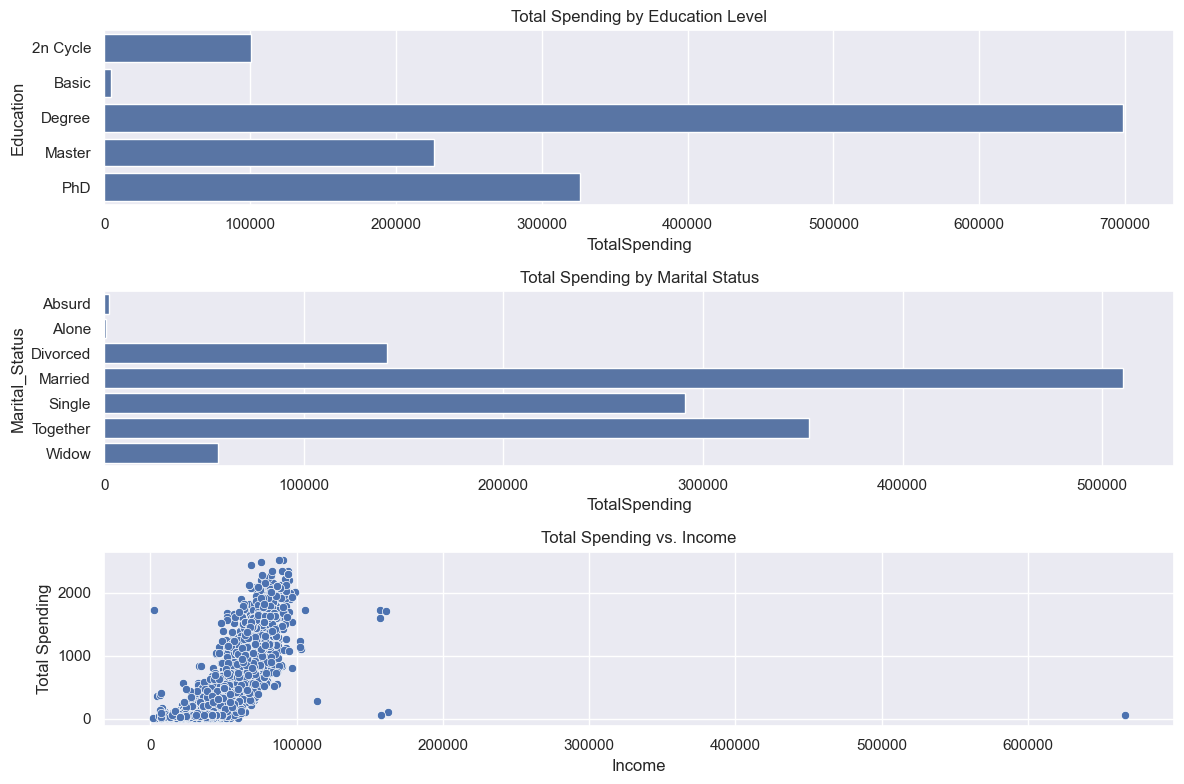

In [171]:

import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by education level and marital status and calculating total spending
total_spending_by_education = fp.groupby('Education')['TotalSpending'].sum().reset_index()
total_spending_by_marital = fp.groupby('Marital_Status')['TotalSpending'].sum().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Set color palette to deep blue
sns.set_palette("deep")

# Create inverted bar plots of total spending for different demographics
plt.subplot(3, 1, 1)
sns.barplot(x='TotalSpending', y='Education', data=total_spending_by_education, orient='h')
plt.title('Total Spending by Education Level')

plt.subplot(3, 1, 2)
sns.barplot(x='TotalSpending', y='Marital_Status', data=total_spending_by_marital, orient='h')
plt.title('Total Spending by Marital Status')

# Create scatter plot of Total Spending vs. Income
plt.subplot(3, 1, 3)
sns.scatterplot(x='Income', y='TotalSpending', data=fp)
plt.title('Total Spending vs. Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')

plt.tight_layout()
plt.show()


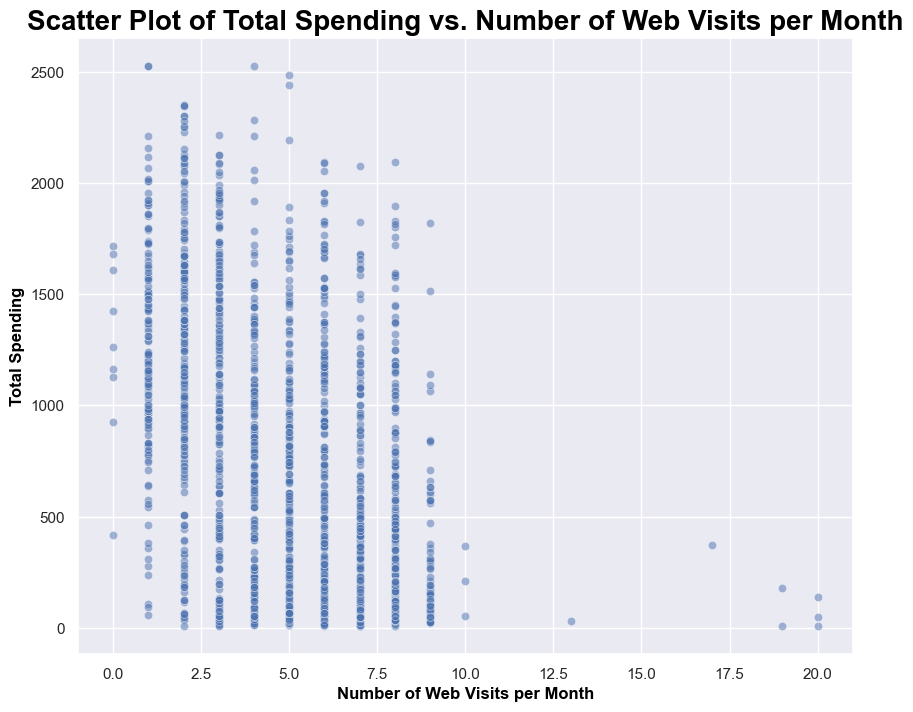

In [172]:
sns.set_palette("deep")

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=fp, x='NumWebVisitsMonth', y='TotalSpending', alpha=0.5)

# Set titles and labels
plt.title('Scatter Plot of Total Spending vs. Number of Web Visits per Month', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Number of Web Visits per Month', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Total Spending', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.show()


***QUE:2. Which channels (web, catalog, store) contribute the most to the total number of purchases ?***

In [173]:
#From sums below Store Purchases contributes most to the Total number of purchases.
fp["NumWebPurchases"].sum()

9136

In [174]:
fp["NumCatalogPurchases"].sum()

5961

In [175]:
fp["NumStorePurchases"].sum()

12958

(-1.0999974326263524,
 1.0999846595899847,
 -1.099991692866393,
 1.0999945376715223)

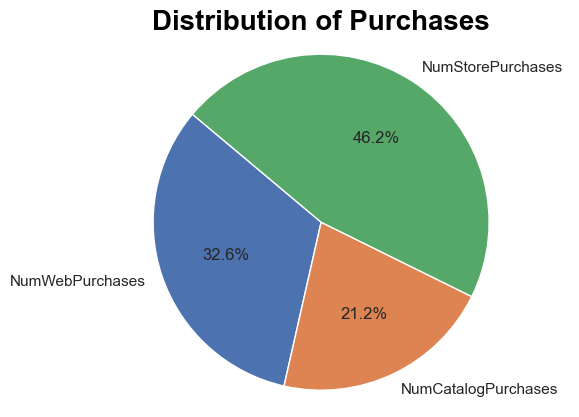

In [176]:

labels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
sizes = [fp["NumWebPurchases"].sum(), fp["NumCatalogPurchases"].sum(), fp["NumStorePurchases"].sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases', fontsize=20, fontweight="bold", color="black")

plt.axis('equal')

***QUE:3. Do certain product categories have higher or lower average purchase values.***

In [177]:
average_purchase_value_by_product = fp[["MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts","MntGoldProds"]].mean()
print(average_purchase_value_by_product)

MntWines            304.460609
MntFruits            26.368397
MntMeatProducts     167.351388
MntSweetProducts     27.132050
MntGoldProds         44.100716
dtype: float64


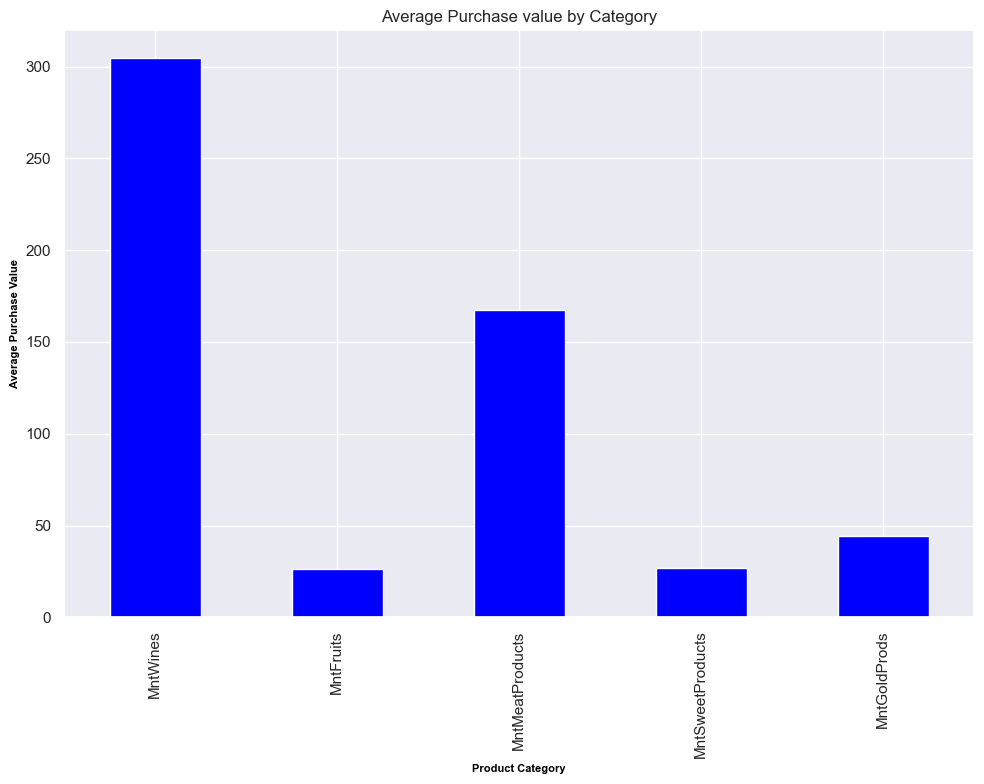

In [178]:
plt.figure(figsize=(10, 8))
average_purchase_value_by_product.plot(kind="bar", color="blue")
plt.title("Average Purchase value by Category")
plt.xlabel("Product Category", fontsize=8, fontweight="bold", color="black")
plt.ylabel("Average Purchase Value", fontsize=8, fontweight="heavy", color="black")
plt.tight_layout()
plt.show()

***QUE:4. How does average purchase value correlate with customer response to campaign ?***

In [179]:
# To check the correlation between two numerical columns 
fp["APV"].corr(fp["Response"])

0.16029734415974375

<function matplotlib.pyplot.show(close=None, block=None)>

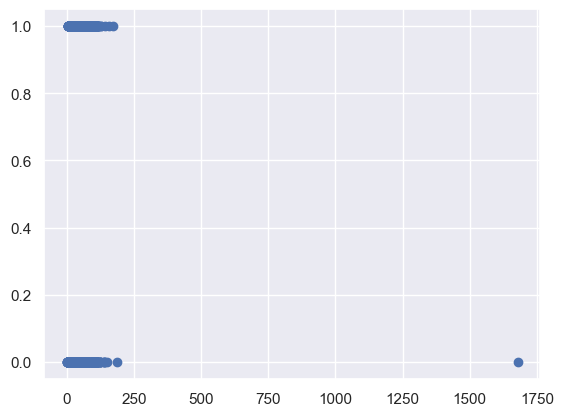

In [180]:
a = fp["APV"]
b = fp["Response"]
plt.scatter(a,b)
plt.show

***QUE:5. Are there specific days of the week, month, weekend/weekday, seasons and holiday indicator when purchase frequency increases or decreases ?***

In [181]:
# Extract days of the week and the frequency
fp["Day_OfWeek"] = fp["Dt_Customer"].dt.day_name()
Purchase_Freq_Byday = fp["Day_OfWeek"].value_counts()

# Print day names and their frequencies
for day, freq in Purchase_Freq_Byday.items():
    print(day, ":", freq)

Sunday : 343
Wednesday : 333
Tuesday : 315
Thursday : 314
Monday : 313
Friday : 313
Saturday : 303


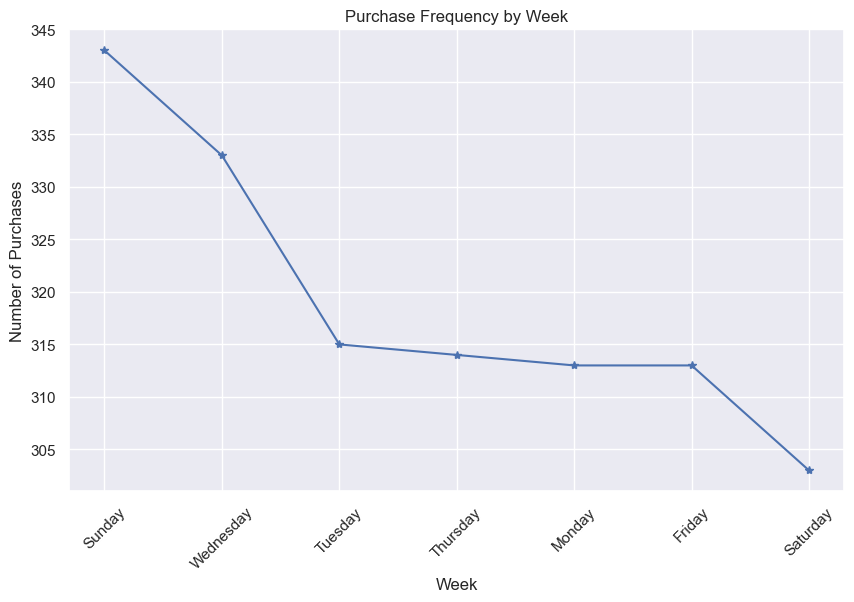

In [182]:
plt.figure(figsize=(10, 6))
Purchase_Freq_Byday.plot(kind='line', marker='*')
plt.title('Purchase Frequency by Week')
plt.xlabel('Week')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [183]:
fp["Month"] = fp["Dt_Customer"].dt.month_name()
Purchase_Freq_Bymonth = fp["Month"].value_counts()
print(Purchase_Freq_Bymonth)

Month
August       210
October      207
March        202
December     202
May          192
January      191
February     187
November     185
April        183
June         169
September    166
July         140
Name: count, dtype: int64


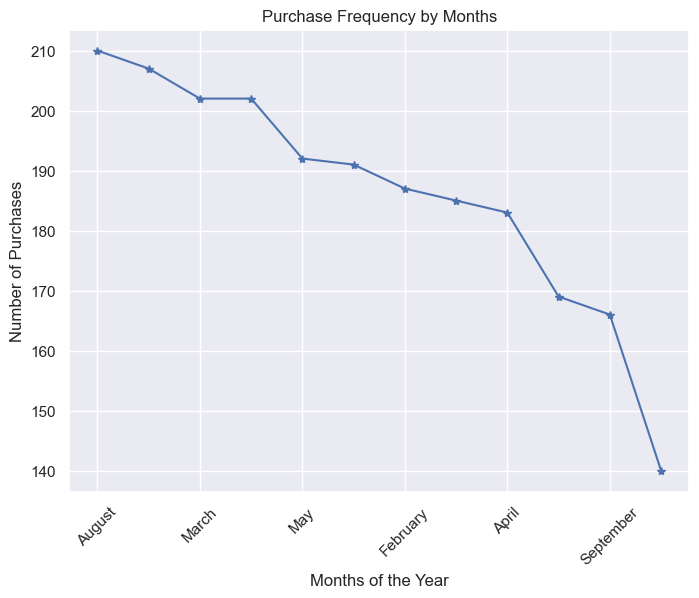

In [184]:
plt.figure(figsize=(8, 6))
Purchase_Freq_Bymonth.plot(kind='line', marker='*')
plt.title('Purchase Frequency by Months')
plt.xlabel('Months of the Year')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [185]:
# Extract year and its frequency
year_purchase_freq = fp["Dt_Customer"].dt.year.value_counts()

# Print years and their frequencies
for year, freq in year_purchase_freq.items():
    print(year, ":", freq)

2013 : 1187
2014 : 555
2012 : 492


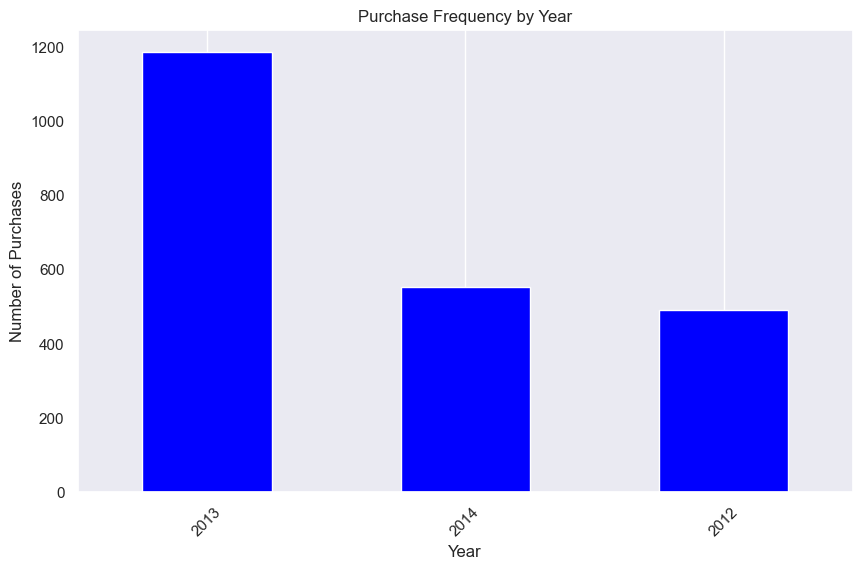

In [186]:
year_purchase_freq = fp["Dt_Customer"].dt.year.value_counts()

# Plotting
plt.figure(figsize=(10, 6))
year_purchase_freq.plot(kind='bar', color='blue')
plt.title('Purchase Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


***6. Does purchase frequency vary based on customer demographics?***

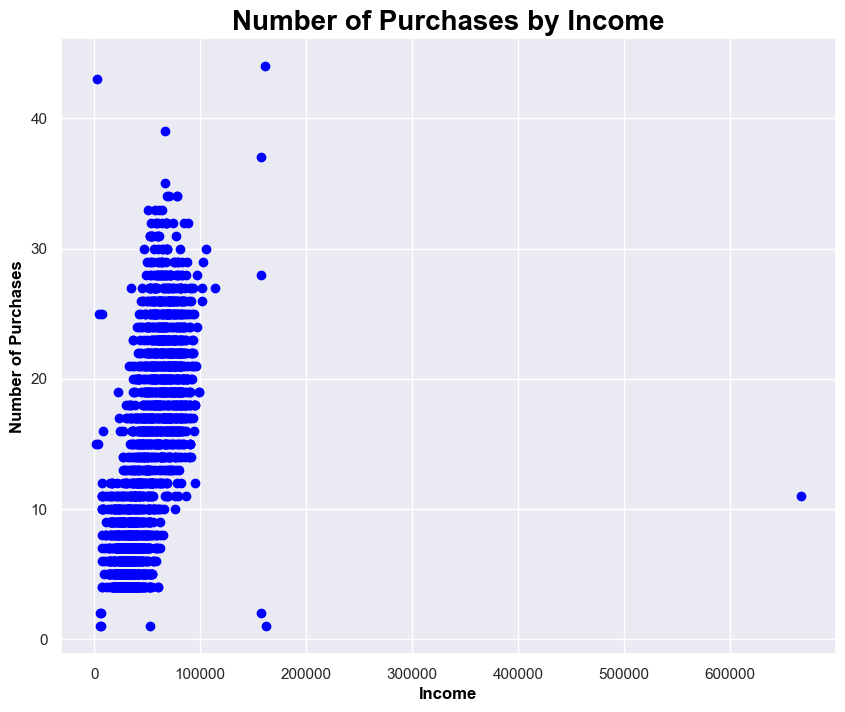

In [187]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x=fp["Income"], y=fp["NumPurchases"], color='blue', marker='o')

# Set titles and labels
plt.title("Number of Purchases by Income", fontsize=20, fontweight="bold", color="black")
plt.xlabel("Income", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Number of Purchases", fontsize=12, fontweight="bold", color="black")

plt.grid(True)  # Adding grid lines
plt.show()


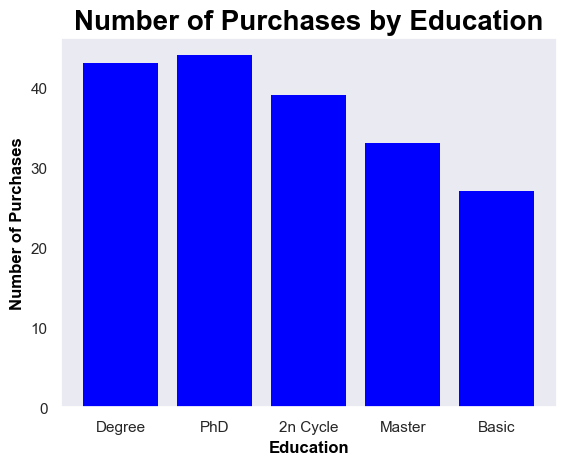

In [188]:
import matplotlib.pyplot as plt

x = fp["Education"]
y = fp["NumPurchases"]

# Assuming x contains numerical codes representing categories of education
# You may need to adjust the tick labels accordingly
plt.bar(x, y, color="blue", edgecolor="black", linewidth=0)  # Changing color to skyblue and removing edge lines
plt.title("Number of Purchases by Education", fontsize=20, fontweight="bold", color="black")
plt.xlabel("Education", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Number of Purchases", fontsize=12, fontweight="bold", color="black")

plt.grid(False) 
plt.show()


Text(0, 0.5, 'Number of Purchases')

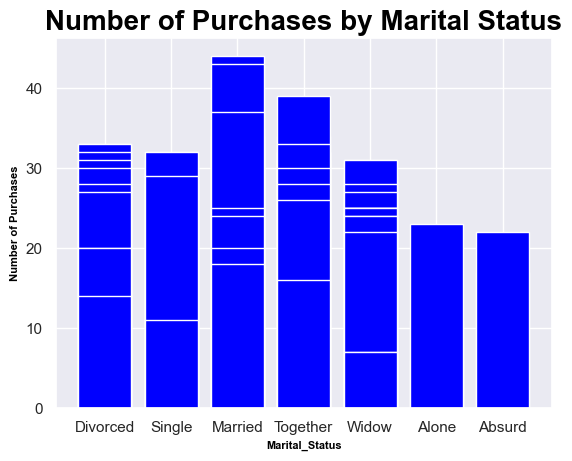

In [189]:
x =fp["Marital_Status"]
y = fp["NumPurchases"] 
plt.bar(x,y, color="blue")
plt.title("Number of Purchases by Marital Status", fontsize = 20, fontweight = "bold", color = "black")
plt.xlabel("Marital_Status", fontsize =8, fontweight= "bold", color ="black")
plt.ylabel("Number of Purchases", fontsize=8, fontweight="bold", color="black")

***7. How can we segment customers based on their CV scores to tailor marketing campaigns or loyalty programs.***

In [190]:
high_value_threshold = fp['CV'].quantile(0.8)
low_value_threshold = fp['CV'].quantile(0.2)

segment = (high_value_threshold, low_value_threshold)
print(segment)


(2.274177553225127, 0.12857894736842104)


In [191]:
import pandas as pd

# Define high and low-value limit
high_value_limit = fp['CV'].quantile(0.8)
low_value_limit = fp['CV'].quantile(0.2)

fp['Segment'] = pd.cut(fp['CV'], bins=[0, low_value_limit, high_value_limit, float('inf')], labels=['Low Value', 'Medium Value', 'High Value'])

print(fp['Segment'])


0         High Value
1         High Value
2       Medium Value
3       Medium Value
4       Medium Value
            ...     
2235    Medium Value
2236       Low Value
2237    Medium Value
2238    Medium Value
2239    Medium Value
Name: Segment, Length: 2234, dtype: category
Categories (3, object): ['Low Value' < 'Medium Value' < 'High Value']


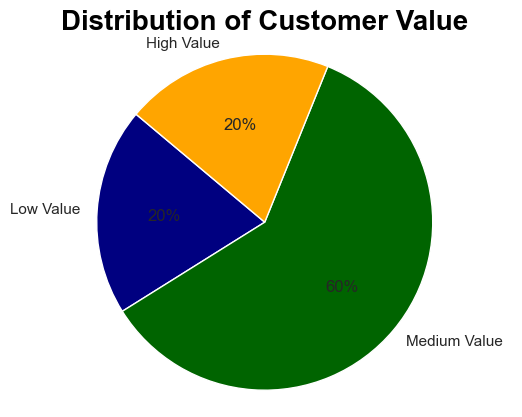

In [192]:
import matplotlib.pyplot as plt

labels = ['Low Value', 'Medium Value', 'High Value']
sizes = [fp["Segment"].eq('Low Value').sum(), fp["Segment"].eq('Medium Value').sum(), fp["Segment"].eq('High Value').sum()]

# Define colors
colors = ['navy', 'darkgreen', 'orange']

# Plot pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=140, colors=colors)  # Change autopct format

# Customize border colors
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.title('Distribution of Customer Value', fontsize=20, fontweight="bold", color="black")

plt.axis('equal')
plt.show()


***8. What characteristics differentiate high-value customers from low-value ones across the features in your dataset?***


In [193]:
#Customers will be segmentized by:

#Purchasing Power: Income
#Monetary Value: Total_Spending
#Frequency: Total_Purchases
# NumWebVisitsMonth

In [194]:
HVC = fp[fp["Segment"] == "High Value"]
LVC = fp[fp["Segment"] == "Low Value"]
HVC_Stats = HVC.describe()
LVC_Stats = LVC.describe()


In [195]:
HVC_Stats = HVC.describe()
LVC_Stats = LVC.describe()
print(HVC_Stats)

              Age     Kidhome    Teenhome                    Dt_Customer  \
count  447.000000  447.000000  447.000000                            447   
mean    56.250559    0.093960    0.308725  2013-12-13 11:32:37.046979840   
min     29.000000    0.000000    0.000000            2012-08-13 00:00:00   
25%     47.000000    0.000000    0.000000            2013-08-10 00:00:00   
50%     55.000000    0.000000    0.000000            2013-12-25 00:00:00   
75%     66.000000    0.000000    1.000000            2014-05-13 00:00:00   
max    125.000000    2.000000    2.000000            2014-12-05 00:00:00   
std     12.925792    0.314285    0.495260                            NaN   

          Recency     MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  447.000000   447.000000  447.000000       447.000000       447.000000   
mean    49.313199   664.402685   58.693512       425.633110        84.791946   
min      0.000000     1.000000    0.000000         9.000000         0.00000

In [196]:
print (LVC_Stats)

              Age     Kidhome    Teenhome                    Dt_Customer  \
count  447.000000  447.000000  447.000000                            447   
mean    51.100671    0.852349    0.362416  2013-05-20 23:31:00.402684672   
min     28.000000    0.000000    0.000000            2012-01-08 00:00:00   
25%     43.000000    1.000000    0.000000            2013-01-07 00:00:00   
50%     50.000000    1.000000    0.000000            2013-05-19 00:00:00   
75%     57.000000    1.000000    1.000000            2013-10-12 00:00:00   
max    131.000000    2.000000    2.000000            2014-08-05 00:00:00   
std     11.389405    0.459711    0.508424                            NaN   

          Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  447.000000  447.000000  447.000000       447.000000       447.000000   
mean    48.653244   11.995526    3.033557        10.194631         4.771812   
min      0.000000    0.000000    0.000000         0.000000         0.000000   

C:\Users\miracle\AppData\Local\Temp\ipykernel_16264\2906509983.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_segment_counts = fp.groupby(['Segment', 'Education']).size().unstack().fillna(0)


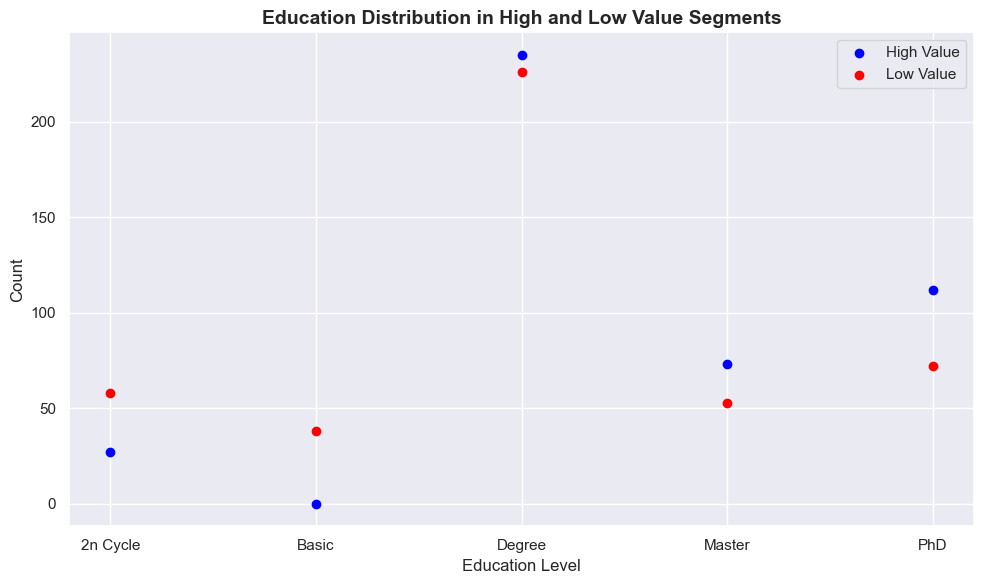

In [197]:
import matplotlib.pyplot as plt

# Group by "Segment" and "Education" and count the number of occurrences
education_segment_counts = fp.groupby(['Segment', 'Education']).size().unstack().fillna(0)

# Create a scatter plot for both segments
plt.figure(figsize=(10, 6))

# Scatter plot for High Value segment
plt.scatter(education_segment_counts.columns, education_segment_counts.loc['High Value'], color='blue', label='High Value')

# Scatter plot for Low Value segment
plt.scatter(education_segment_counts.columns, education_segment_counts.loc['Low Value'], color='red', label='Low Value')

plt.title('Education Distribution in High and Low Value Segments', fontsize=14, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


In [198]:

# to check the distribution of response by education variable
fp[['Education','Response']].groupby('Education').agg({'Response':'value_counts'})
     


Response
Education Response          
2n Cycle  0              181
          1               22
Basic     0               52
          1                2
Degree    0              972
          1              152
Master    0              313
          1               57
PhD       0              383
          1              100

In [199]:
fp[['Education','Response']].groupby('Education').agg({'Response':'mean'}).round(2)

,Response
Education,
2n Cycle,0.11
Basic,0.04
Degree,0.14
Master,0.15
PhD,0.21


***9. Are there early indicators in a customer's journey that predict their potential CV and likelihood of becoming a loyal repeat purchaser?***


In [245]:
fp.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays,APV,APF,CV,Day_OfWeek,Month,Segment,Days_since_first_purchase,LCV,HCV
0,54,Degree,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15,0,6,2014,True,False,False,79.33,0.075758,6.009848,Monday,June,High Value,3636,True,False
1,63,Degree,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18,6,6,2014,False,True,False,32.06,0.090452,2.899899,Sunday,June,High Value,3637,True,False
2,66,Degree,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11,1,5,2014,True,False,False,22.82,0.047414,1.081983,Tuesday,May,Medium Value,3670,True,False
3,57,Degree,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4,2,11,2014,True,False,False,2.75,0.071429,0.196429,Wednesday,November,Medium Value,3494,True,False
4,35,Degree,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8,0,8,2014,True,False,False,11.38,0.053691,0.611007,Monday,August,Medium Value,3587,True,False


In [200]:
fp["Dt_Customer"] = pd.to_datetime(fp["Dt_Customer"])

# Get the current date
current_date = datetime.now()
fp["Days_since_first_purchase"] = (current_date - fp["Dt_Customer"]).dt.days

In [201]:
# Count the occurrences of each unique value in the "Response" column, where 1=Yes and 0=No
Response_counts = fp['Response'].value_counts()

# Display the counts
print(Response_counts)


Response
0    1901
1     333
Name: count, dtype: int64


In [202]:
# Count of Yes and No Complains received.
Complain_counts = fp['Complain'].value_counts()
# Display the counts
print(Complain_counts)


Complain
0    2213
1      21
Name: count, dtype: int64


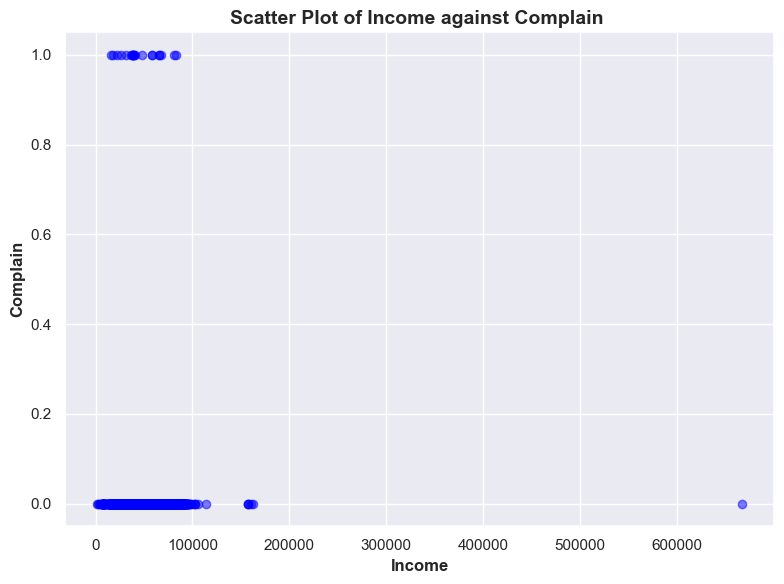

In [252]:
#Customers earning higher salaries majorly made no complain about goods bought.
# Filter rows where "Complain" is 1 or 0
filtered_data = fp[(fp['Complain'] == 1) | (fp['Complain'] == 0)]

# Extracting data for plotting
x = filtered_data['Income']
y = filtered_data['Complain']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Complain', fontsize=12, fontweight='bold')
plt.title('Scatter Plot of Income against Complain ', fontsize=14, fontweight='bold')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


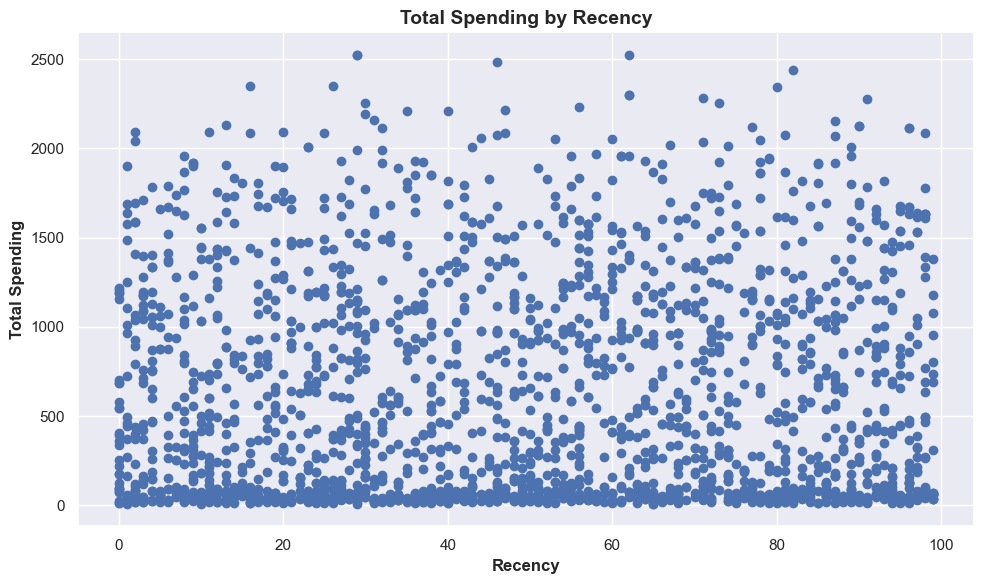

In [253]:
import matplotlib.pyplot as plt

# Assuming fp is your DataFrame containing "Recency" and "TotalSpending" columns

# Sort the DataFrame by "Recency" if necessary
fp_sorted = fp.sort_values(by="Recency")

# Extracting data for plotting
x = fp_sorted["Recency"]
y = fp_sorted["TotalSpending"]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b')

# Adding labels and title
plt.xlabel('Recency', fontsize=12, fontweight='bold')
plt.ylabel('Total Spending', fontsize=12, fontweight='bold')
plt.title('Total Spending by Recency', fontsize=14, fontweight='bold')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


***10. Are there product bundles that resonate particularly well with high-CV customers ?***

In [205]:
fp.dtypes["CV"]

dtype('float64')

In [206]:
# Creating two new columns LCV and HCV based on conditions
fp["LCV"] = fp["CV"] < 40
fp["HCV"] = fp["CV"] > 40


In [207]:
fp.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays,APV,APF,CV,Day_OfWeek,Month,Segment,Days_since_first_purchase,LCV,HCV
0,54,Degree,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,15,0,6,2014,True,False,False,79.33,0.075758,6.009848,Monday,June,High Value,3636,True,False
1,63,Degree,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,18,6,6,2014,False,True,False,32.06,0.090452,2.899899,Sunday,June,High Value,3637,True,False
2,66,Degree,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,11,1,5,2014,True,False,False,22.82,0.047414,1.081983,Tuesday,May,Medium Value,3670,True,False
3,57,Degree,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,4,2,11,2014,True,False,False,2.75,0.071429,0.196429,Wednesday,November,Medium Value,3494,True,False
4,35,Degree,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,8,0,8,2014,True,False,False,11.38,0.053691,0.611007,Monday,August,Medium Value,3587,True,False


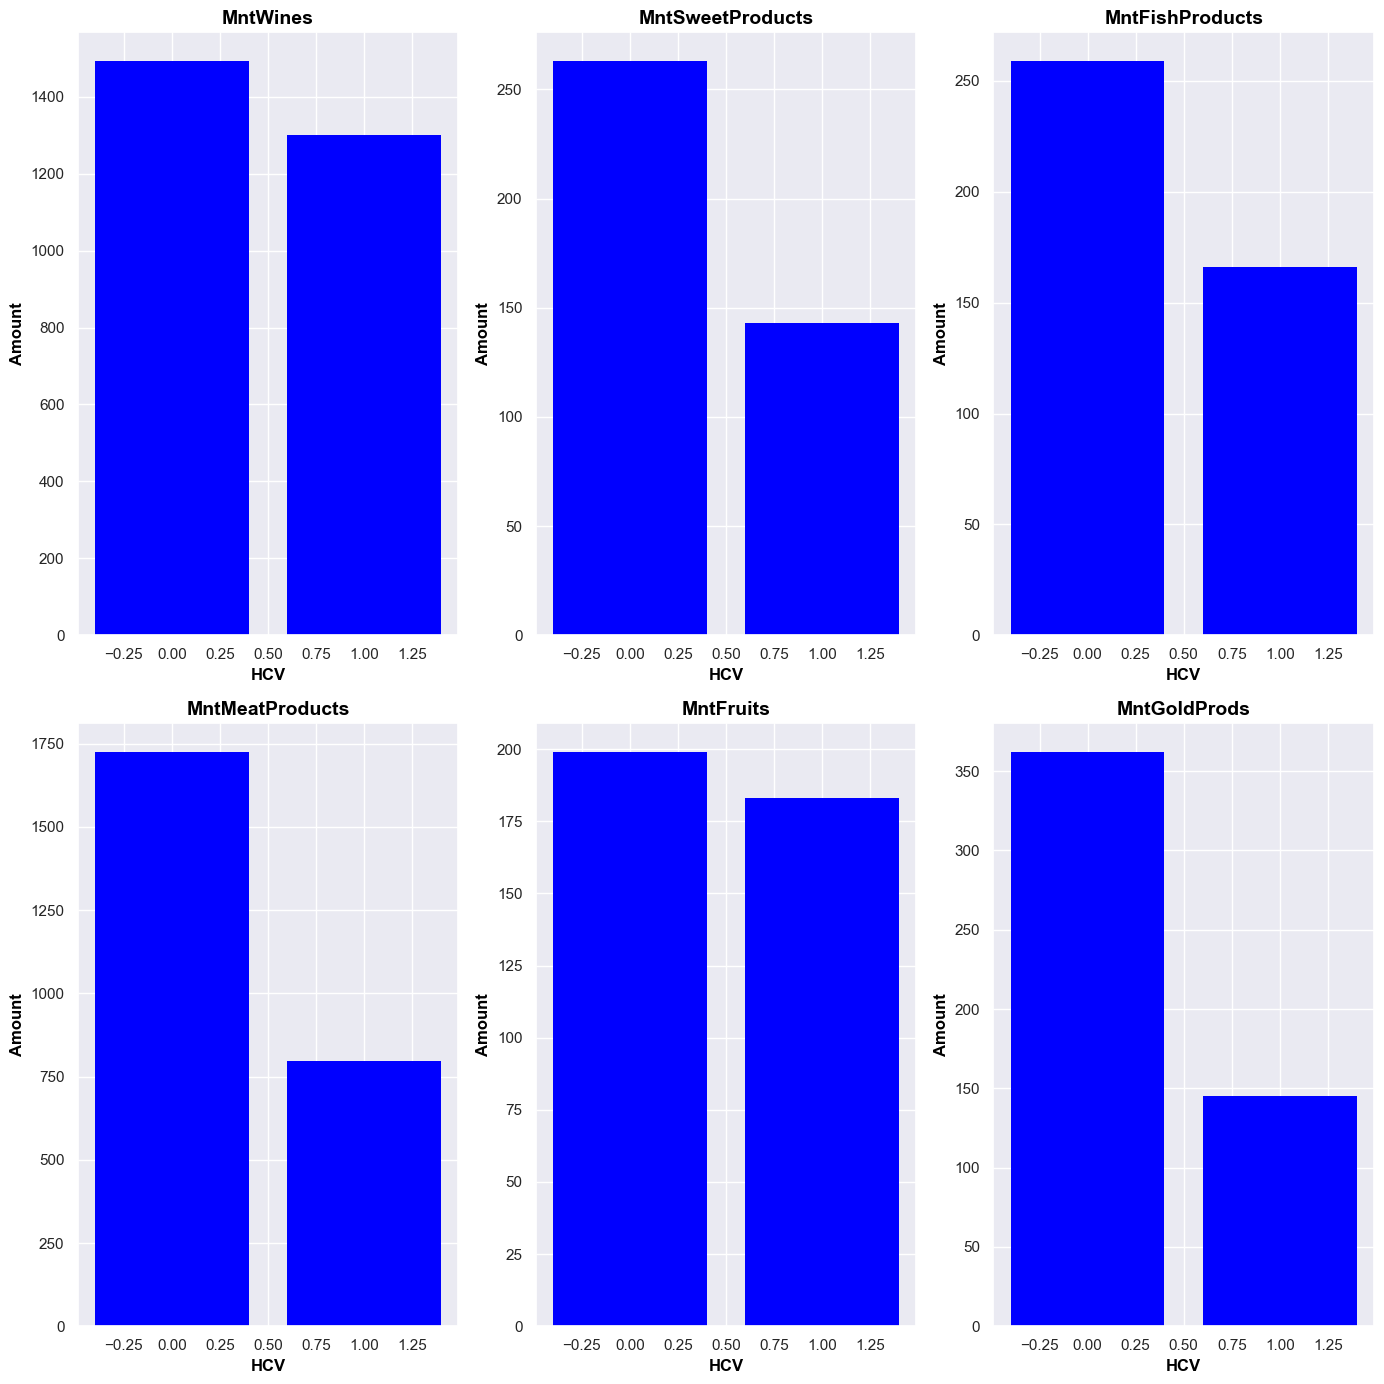

In [208]:
import matplotlib.pyplot as plt

# Assuming fp is our DataFrame containing columns "HCV", "MntWines", "MntSweetProducts", ..., "MntGoldProds"

# Define x (assuming it represents HCV)
x = fp["HCV"]

# Define y-values for each plot
y1 = fp["MntWines"]
y2 = fp["MntSweetProducts"]
y3 = fp["MntFishProducts"]
y4 = fp["MntMeatProducts"]
y5 = fp["MntFruits"]
y6 = fp["MntGoldProds"]

# Creating subplots with vertical orientation
fig, axs = plt.subplots(2, 3, figsize=(14, 14))

# Plotting MntWines
axs[0, 0].bar(x, y1, color="blue", edgecolor="black", linewidth=0)
axs[0, 0].set_title("MntWines", fontsize=14, fontweight="bold", color="black")
axs[0, 0].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[0, 0].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntSweetProducts
axs[0, 1].bar(x, y2, color="blue", edgecolor="black", linewidth=0)
axs[0, 1].set_title("MntSweetProducts", fontsize=14, fontweight="bold", color="black")
axs[0, 1].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[0, 1].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntFishProducts
axs[0, 2].bar(x, y3, color="blue", edgecolor="black", linewidth=0)
axs[0, 2].set_title("MntFishProducts", fontsize=14, fontweight="bold", color="black")
axs[0, 2].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[0, 2].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntMeatProducts
axs[1, 0].bar(x, y4, color="blue", edgecolor="black", linewidth=0)
axs[1, 0].set_title("MntMeatProducts", fontsize=14, fontweight="bold", color="black")
axs[1, 0].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[1, 0].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntFruits
axs[1, 1].bar(x, y5, color="blue", edgecolor="black", linewidth=0)
axs[1, 1].set_title("MntFruits", fontsize=14, fontweight="bold", color="black")
axs[1, 1].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[1, 1].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

# Plotting MntGoldProds
axs[1, 2].bar(x, y6, color="blue", edgecolor="black", linewidth=0)
axs[1, 2].set_title("MntGoldProds", fontsize=14, fontweight="bold", color="black")
axs[1, 2].set_xlabel("HCV", fontsize=12, fontweight="bold", color="black")
axs[1, 2].set_ylabel("Amount", fontsize=12, fontweight="bold", color="black")

plt.tight_layout()
plt.show()


#### MACHINE LEARNING BY CLASSIFICATION; PREDICTING CUSTOMER RESPONSE

In [209]:
train, test = train_test_split(fp, test_size=0.3, random_state=123)

In [210]:
print(fp.shape)
print(train.shape)
print(test.shape)

(2234, 38)
(1563, 38)
(671, 38)


In [211]:
train.isnull().sum()

Age                          0
Education                    0
Marital_Status               0
Income                       0
Kidhome                      0
Teenhome                     0
Dt_Customer                  0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
Response                     0
Complain                     0
TotalSpending                0
NumPurchases                 0
day_week                     0
month                        0
year                         0
weekday                      0
weekend                      0
Holidays                     0
APV                          0
APF                          0
CV                           0
Day_OfWe

In [212]:
#A1
train.reset_index(drop=True, inplace=True)

In [213]:
train.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpending,NumPurchases,day_week,month,year,weekday,weekend,Holidays,APV,APF,CV,Day_OfWeek,Month,Segment,Days_since_first_purchase,LCV,HCV
0,67,Degree,Married,71113.0,0,1,2013-12-17,95,495,33,255,11,33,8,4,6,7,9,4,0,0,835,26,1,12,2013,True,False,False,32.12,0.068602,2.203483,Tuesday,December,Medium Value,3817,True,False
1,48,Degree,Together,62061.0,0,1,2013-08-31,12,641,7,84,0,30,38,3,10,4,7,6,0,0,800,24,5,8,2013,False,True,False,33.33,0.049281,1.642546,Saturday,August,Medium Value,3925,True,False
2,34,Degree,Single,96843.0,0,0,2013-04-23,60,448,71,951,40,17,17,1,6,11,10,2,1,0,1544,28,1,4,2013,True,False,False,55.14,0.045381,2.502301,Tuesday,April,High Value,4055,True,False
3,55,PhD,Single,66582.0,0,0,2014-03-03,83,789,25,420,16,38,0,1,2,8,9,1,0,0,1288,20,0,3,2014,True,False,False,64.40,0.066007,4.250825,Monday,March,High Value,3741,True,False
4,64,Degree,Together,62807.0,0,1,2012-08-31,83,526,28,135,10,21,99,3,5,3,12,5,0,0,819,23,4,8,2012,True,False,False,35.61,0.026995,0.961303,Friday,August,Medium Value,4290,True,False


In [214]:
train.dtypes

Age                                   int64
Education                            object
Marital_Status                       object
Income                               object
Kidhome                               int64
Teenhome                              int64
Dt_Customer                  datetime64[ns]
Recency                               int64
MntWines                              int64
MntFruits                             int64
MntMeatProducts                       int64
MntFishProducts                       int64
MntSweetProducts                      int64
MntGoldProds                          int64
NumDealsPurchases                     int64
NumWebPurchases                       int64
NumCatalogPurchases                   int64
NumStorePurchases                     int64
NumWebVisitsMonth                     int64
Response                              int64
Complain                              int64
TotalSpending                         int64
NumPurchases                    

In [215]:
# Convert the column to float
train['Income'] = train['Income'].astype(float)


In [216]:
# Check for duplicates
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1558    False
1559     True
1560     True
1561    False
1562    False
Length: 1563, dtype: bool

In [217]:
#2
train.drop_duplicates(keep="first", inplace=True, ignore_index=True)

In [218]:
# finding and dropping of Outliers

def drop_outliers(data, var):
    q1, q3 = np.percentile(data[var],[25,75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr 
    upper = q3 + 1.5 * iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace=True)
    return data 

In [219]:
#3
#The next step is data transformation, that is to split data into features and target
target = "Response"
X_train = train.drop(target, axis=1) #-features
y_train = train[target] #-target

In [220]:
columns_to_drop = ["NumWebVisitsMonth","NumStorePurchases","Age", "Kidhome","Teenhome", 
                   "MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", 
                   "MntGoldProds", "NumDealsPurchases","NumWebPurchases","MntSweetProducts",
                   "NumCatalogPurchases","Dt_Customer","Days_since_first_purchase", 
                   "day_week", "month", "year", "weekday", "weekend", "Holidays", 
                   "Day_OfWeek", "Month",]

# Drop columns
X_train_n = X_train.drop(columns=columns_to_drop, axis=1, inplace = True)


In [221]:
cat = []
for i in X_train.columns:
    if X_train[i].dtype == "object":
        cat.append(i)

num = []
for i in X_train.columns:
    if X_train[i].dtype != "object":
        num.append(i)

In [222]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

### FEATURE ENGINEERING

In [223]:
X_train.head(2)

,Education,Marital_Status,Income,Recency,Complain,TotalSpending,NumPurchases,APV,APF,CV,Segment,LCV,HCV
0,Degree,Married,71113.0,95,0,835,26,32.12,0.068602,2.203483,Medium Value,True,False
1,Degree,Together,62061.0,12,0,800,24,33.33,0.049281,1.642546,Medium Value,True,False


In [224]:
cat_feat = []
for i in X_train.columns:
        if X_train[i].dtype != "int64" and X_train[i].dtype != "float64":
            cat_feat.append(i)

In [225]:
print(cat_feat)

['Education', 'Marital_Status', 'Segment', 'LCV', 'HCV']


In [226]:
num_feat = []
for i in X_train.columns:
        if X_train[i].dtype == "int64" or X_train[i].dtype == "float64":
            num_feat.append(i)

In [255]:
from sklearn.preprocessing import OrdinalEncoder

# Sample categorical data
X_train = [['Basic'], ['Degree'], ['2n Cycle'], ['phd']]

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(data)

print(encoded_data)


NameError: name 'data' is not defined

In [227]:
print(num_feat)

['Income', 'Recency', 'Complain', 'TotalSpending', 'NumPurchases', 'APV', 'APF', 'CV']


In [228]:
X_train[cat_feat]

,Education,Marital_Status,Segment,LCV,HCV
0,Degree,Married,Medium Value,True,False
1,Degree,Together,Medium Value,True,False
2,Degree,Single,High Value,True,False
3,PhD,Single,High Value,True,False
4,Degree,Together,Medium Value,True,False
...,...,...,...,...,...
1474,Degree,Married,Medium Value,True,False
1475,Degree,Together,Medium Value,True,False
1476,Degree,Together,Medium Value,True,False
1477,PhD,Together,High Value,True,False


In [229]:
X_train[num_feat]

,Income,Recency,Complain,TotalSpending,NumPurchases,APV,APF,CV
0,71113.0,95,0,835,26,32.12,0.068602,2.203483
1,62061.0,12,0,800,24,33.33,0.049281,1.642546
2,96843.0,60,0,1544,28,55.14,0.045381,2.502301
3,66582.0,83,0,1288,20,64.40,0.066007,4.250825
4,62807.0,83,0,819,23,35.61,0.026995,0.961303
...,...,...,...,...,...,...,...,...
1474,77981.0,78,0,664,21,31.62,0.035959,1.137021
1475,44392.0,71,0,211,14,15.07,0.023295,0.351048
1476,22682.0,51,0,95,10,9.50,0.015129,0.143722
1477,69805.0,50,0,1038,27,38.44,0.078488,3.017093


In [230]:
#A5
scaler = StandardScaler()
X_train[num_feat] = scaler.fit_transform(X_train[num_feat])

In [231]:
X_train[num_feat]

,Income,Recency,Complain,TotalSpending,NumPurchases,APV,APF,CV
0,0.885772,1.563420,-0.101222,0.386742,1.455691,-0.029282,0.422740,0.131560
1,0.463511,-1.274847,-0.101222,0.328264,1.193374,-0.005756,0.133569,0.003876
2,2.086036,0.366561,-0.101222,1.571347,1.718008,0.418291,0.075190,0.199578
3,0.674408,1.153068,-0.101222,1.143620,0.668740,0.598331,0.383900,0.597587
4,0.498310,1.153068,-0.101222,0.360009,1.062216,0.038574,-0.199991,-0.151192
...,...,...,...,...,...,...,...,...
1474,1.206153,0.982088,-0.101222,0.101034,0.799898,-0.039003,-0.065830,-0.111194
1475,-0.360720,0.742716,-0.101222,-0.655844,-0.118211,-0.360781,-0.255381,-0.290102
1476,-1.373457,0.058797,-0.101222,-0.849658,-0.642845,-0.469077,-0.377602,-0.337295
1477,0.824756,0.024601,-0.101222,0.725917,1.586850,0.093597,0.570718,0.316758


### Multicollinerity

<Axes: >

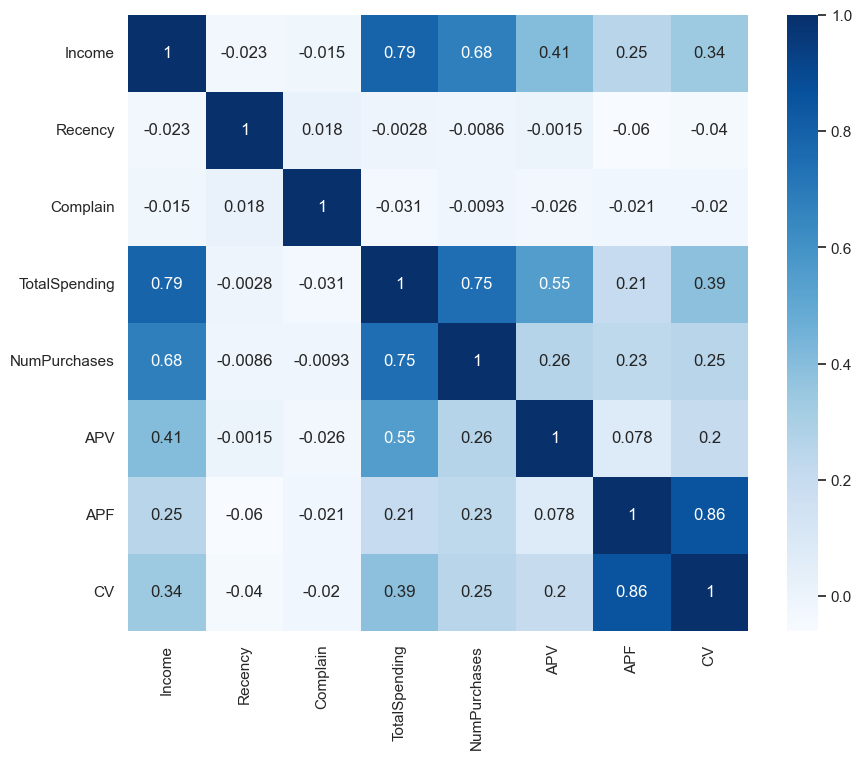

In [232]:
plt.figure(figsize=(10,8))
cors = X_train[num_feat].corr()
sns.heatmap(cors, annot=True, cmap="Blues")

In [233]:
X_train[num_feat].corrwith(y_train)

Income           0.164431
Recency         -0.202605
Complain         0.013492
TotalSpending    0.272656
NumPurchases     0.164007
APV              0.136228
APF             -0.019667
CV               0.064501
dtype: float64

In [234]:
print(y_train.unique())


[0 1]


In [235]:

X_train.drop("CV", axis=1, inplace=True)

In [236]:
X_train[cat_feat]

,Education,Marital_Status,Segment,LCV,HCV
0,Degree,Married,Medium Value,True,False
1,Degree,Together,Medium Value,True,False
2,Degree,Single,High Value,True,False
3,PhD,Single,High Value,True,False
4,Degree,Together,Medium Value,True,False
...,...,...,...,...,...
1474,Degree,Married,Medium Value,True,False
1475,Degree,Together,Medium Value,True,False
1476,Degree,Together,Medium Value,True,False
1477,PhD,Together,High Value,True,False


In [237]:
#A11
encoder = OneHotEncoder(drop="first", dtype=int)

enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat_feat]).toarray())
enc_data.columns = encoder.get_feature_names_out()

X_train = X_train.join(enc_data)
X_train.drop(cat_feat, axis=1, inplace=True)

In [238]:
decision_tree = DecisionTreeClassifier(max_depth= 10)
decision_tree.fit(X_train, y_train)
predictors = X_train.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
TotalSpending,0.216212
APF,0.185257
Recency,0.167154
Income,0.164397
APV,0.097734
Marital_Status_Single,0.051677
NumPurchases,0.036421
Marital_Status_Widow,0.017026
Education_Master,0.010897
Education_Degree,0.010555


In [239]:
res = coef.to_frame()
res.head(10).index

Index(['TotalSpending', 'APF', 'Recency', 'Income', 'APV',
       'Marital_Status_Single', 'NumPurchases', 'Marital_Status_Widow',
       'Education_Master', 'Education_Degree'],
      dtype='object')

In [240]:
top_10 =['TotalSpending', 'Income', 'APF', 'Recency', 'APV', 'NumPurchases',
       'Marital_Status_Single', 'Education_Degree', 'Marital_Status_Widow',
       'Segment_Medium Value']

In [241]:
X_train= X_train[top_10]

In [242]:
X_train.head()

,TotalSpending,Income,APF,Recency,APV,NumPurchases,Marital_Status_Single,Education_Degree,Marital_Status_Widow,Segment_Medium Value
0,0.386742,0.885772,0.422740,1.563420,-0.029282,1.455691,0,1,0,1
1,0.328264,0.463511,0.133569,-1.274847,-0.005756,1.193374,0,1,0,1
2,1.571347,2.086036,0.075190,0.366561,0.418291,1.718008,1,1,0,0
3,1.143620,0.674408,0.383900,1.153068,0.598331,0.668740,1,0,0,0
4,0.360009,0.498310,-0.199991,1.153068,0.038574,1.062216,0,1,0,1


In [243]:
def prepare(d):
    train.reset_index(drop=True, inplace=True)
    # Convert the column to float
    train['Income'] = train['Income'].astype(float)

    train.drop_duplicates(keep="first", inplace=True, ignore_index=True)

    target = "Response"
    X_train = train.drop(target, axis=1) #-features
    y_train = train[target] #-target

    scaler = StandardScaler()
    X_train[num_feat] = scaler.fit_transform(X_train[num_feat])

    #A9
    y_train = y_train.replace({"Yes": 1, "No": 0})
    
    X_train.drop("APF", axis=1, inplace=True)

    encoder = OneHotEncoder(drop="first", dtype=int)

    enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat_feat]).toarray())
    enc_data.columns = encoder.get_feature_names_out()

    X_train = X_train.join(enc_data)
    X_train.drop(cat_feat, axis=1, inplace=True)

    X_d_new = X_d_new[top_10]

    return X_d_new , y_d
    

In [244]:
X_test, y_test = prepare(test)

UnboundLocalError: cannot access local variable 'X_d_new' where it is not associated with a value

In [ ]:
y_train.value_counts()

Response
0    1254
1     225
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler